# Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet

# !conda install -c conda-forge xgboost -y
from xgboost import XGBRegressor

# Set notebook parameters

In [2]:
PLOT_SIZE = 16
SAMPLE_SIZE = 200
SEED = 2021

# Define ground truth

In [3]:
def true_function(x):
    return(np.exp(x)/(x**4+1) + x*np.sin(x)/3 + 0.1 * x)

In [4]:
x_min = -10
x_max = 10

In [5]:
x = np.arange(x_min, x_max, 0.1)
f_x = true_function(x) 

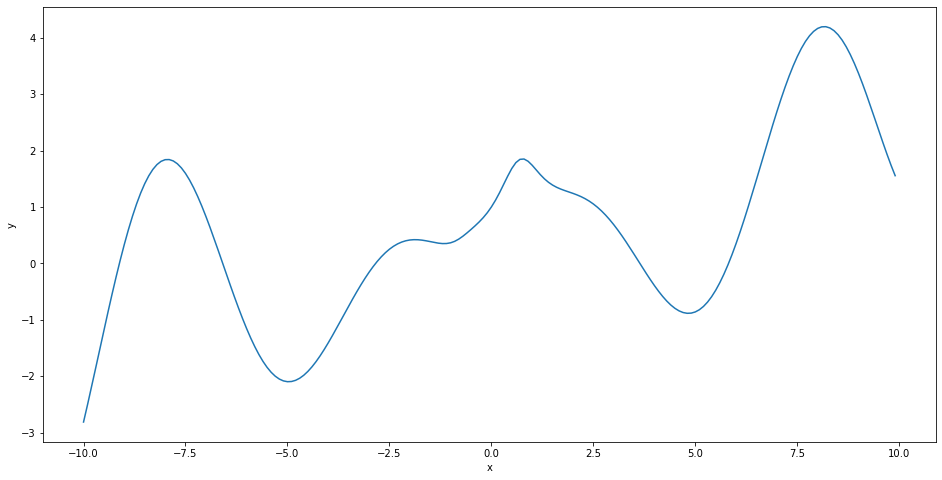

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

ax.plot(x, f_x)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

# Sampling the data

In [7]:
def get_epsilon(confidence):
    return(norm.ppf(1-((1-confidence)/2)))

e_90 = get_epsilon(0.9)
e_95 = get_epsilon(0.95)
e_99 = get_epsilon(0.99)

In [8]:
e_99

2.5758293035489004

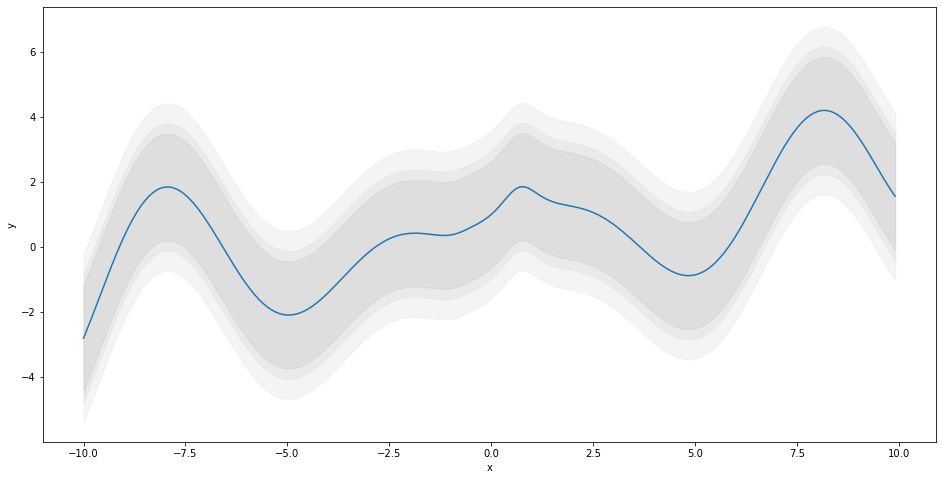

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

plt.plot(x, f_x)
#ax.fill_between(x, f_x + e_80, f_x - e_80, color = '#696969', alpha = 0.3)
ax.fill_between(x, f_x + e_90, f_x - e_90, color = '#A9A9A9', alpha = 0.3)
ax.fill_between(x, f_x + e_95, f_x - e_95, color = '#D3D3D3', alpha = 0.3)
ax.fill_between(x, f_x + e_99, f_x - e_99, color = '#DCDCDC', alpha = 0.3)

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [10]:
np.random.seed(seed=SEED)
x_ = np.random.choice(x, SAMPLE_SIZE)
y_ = true_function(x_) + np.random.normal(size=SAMPLE_SIZE)

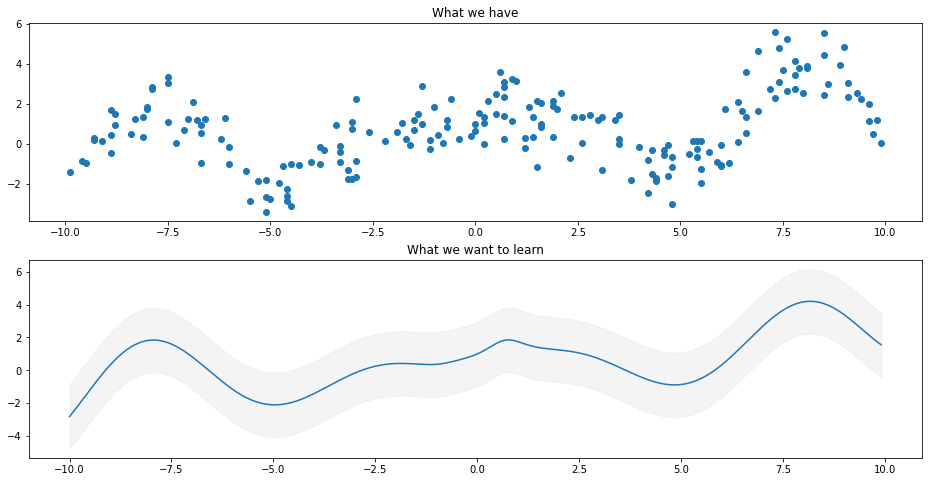

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

ax[0].set_title('What we have')
ax[0].scatter(x_, y_)

ax[1].set_title('What we want to learn')
ax[1].plot(x, f_x)
ax[1].fill_between(x, f_x + e_95, f_x - e_95, color = '#DCDCDC', alpha = 0.3)

plt.show()

# Split train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    x_,
    y_, 
    random_state=SEED+1)

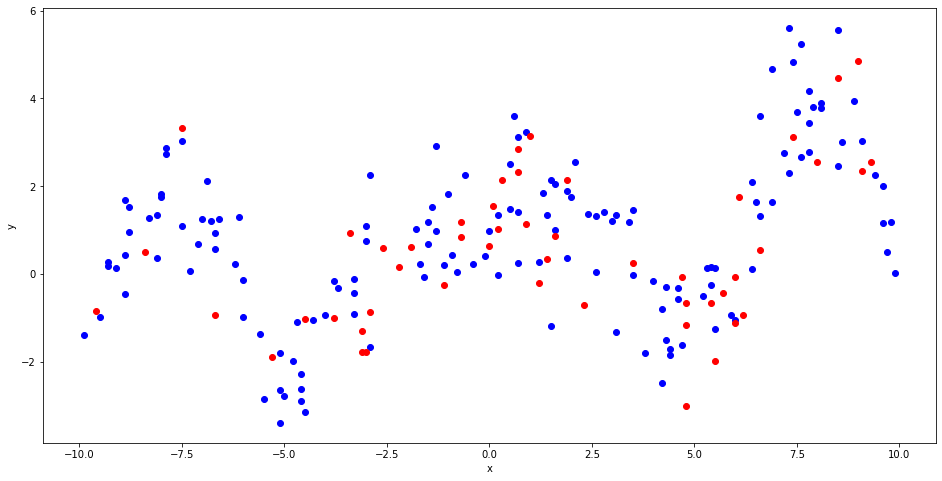

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

#ax.plot(x, f_x)
ax.scatter(X_train, y_train, color='blue')
ax.scatter(X_test, y_test, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

# Modeling

## Baseline

In [14]:
def fx_baseline(x):
    return(np.mean(y_train))

In [15]:
fx_baseline(10)

0.8189576395305539

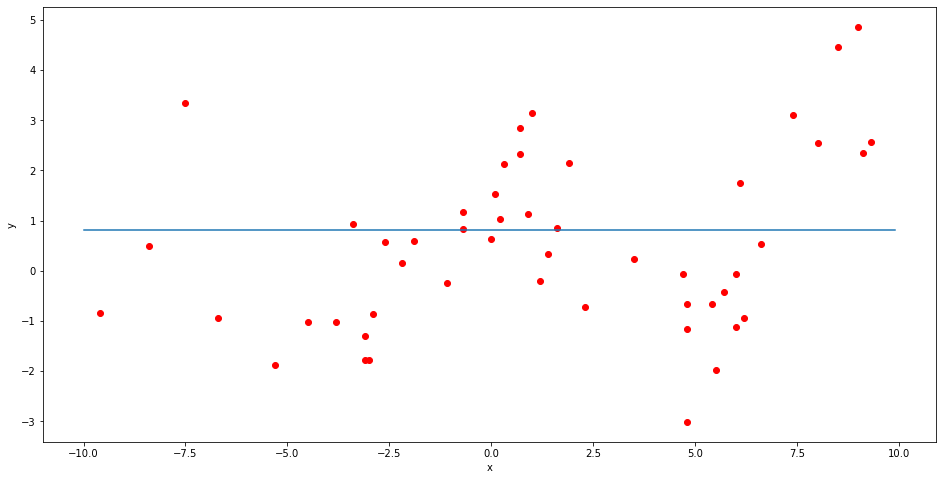

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

#ax.plot(x, f_x)
fx_plot = [fx_baseline(x) for x in x]
ax.plot(x, fx_plot)
ax.scatter(X_test, y_test, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [17]:
fx_test_baseline = [fx_baseline(x) for x in X_test]
rmse_baseline = mean_squared_error(y_test, fx_test_baseline, squared=False)
print('RMSE (Baseline): ' + str(round(rmse_baseline, 2)))

RMSE (Baseline): 1.76


## Linear Regression

In [18]:
linear_model = make_pipeline(StandardScaler(), LinearRegression())

In [19]:
X_train_ = X_train.reshape(-1, 1)
X_test_ = X_test.reshape(-1, 1)

In [20]:
linear_model.fit(X_train_, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [21]:
def fx_lr(x):
    return(linear_model.predict(x))

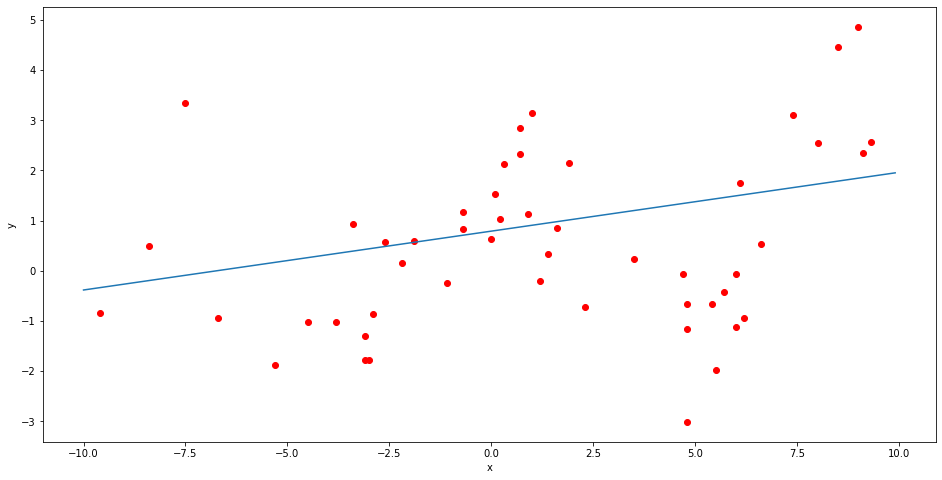

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

#ax.plot(x, f_x)
fx_plot = fx_lr(x.reshape(-1, 1))
ax.plot(x, fx_plot)
ax.scatter(X_test, y_test, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [23]:
fx_test_lr = fx_lr(X_test_)
rmse_lr = mean_squared_error(y_test, fx_test_lr, squared=False)
print('RMSE (Baseline): ' + str(round(rmse_baseline, 3)))
print('RMSE (Linear Regression): ' + str(round(rmse_lr, 3)))

RMSE (Baseline): 1.755
RMSE (Linear Regression): 1.702


## Quadratic Regression

In [24]:
quadratic_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, interaction_only=False),
    LinearRegression()
)

In [25]:
quadratic_model.fit(X_train_, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [26]:
def fx_qr(x):
    return(quadratic_model.predict(x))

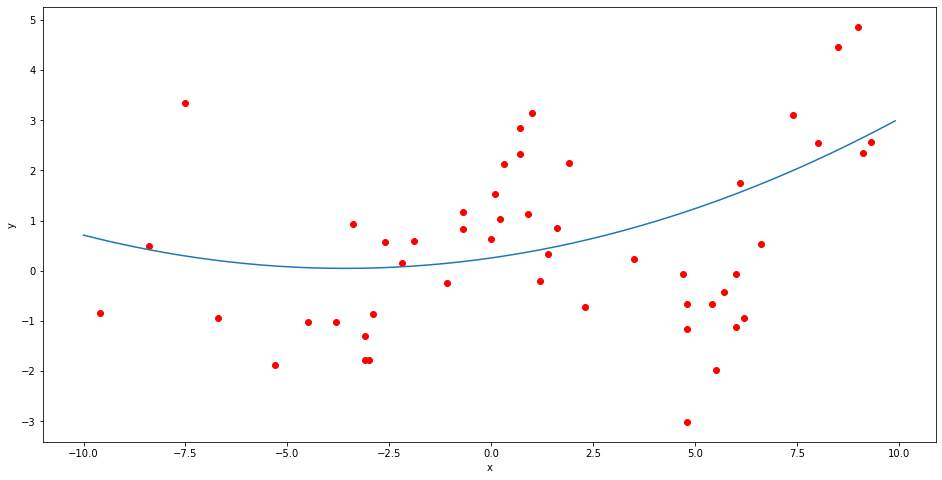

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

#ax.plot(x, f_x)
fx_plot = fx_qr(x.reshape(-1, 1))
ax.plot(x, fx_plot)
ax.scatter(X_test, y_test, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [28]:
fx_test_qr = fx_qr(X_test_)
rmse_qr = mean_squared_error(y_test, fx_test_qr, squared=False)
print('RMSE (Baseline): ' + str(round(rmse_baseline, 3)))
print('RMSE (Linear Regression): ' + str(round(rmse_lr, 3)))
print('RMSE (Quadratic Regression): ' + str(round(rmse_qr, 3)))

RMSE (Baseline): 1.755
RMSE (Linear Regression): 1.702
RMSE (Quadratic Regression): 1.648


## Polynomial Regression (fixed degree)

In [29]:
polynomial_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=50, interaction_only=False),
    LinearRegression()
)

In [30]:
polynomial_model.fit(X_train_, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=50)),
                ('linearregression', LinearRegression())])

In [31]:
def fx_pr(x):
    return(polynomial_model.predict(x))

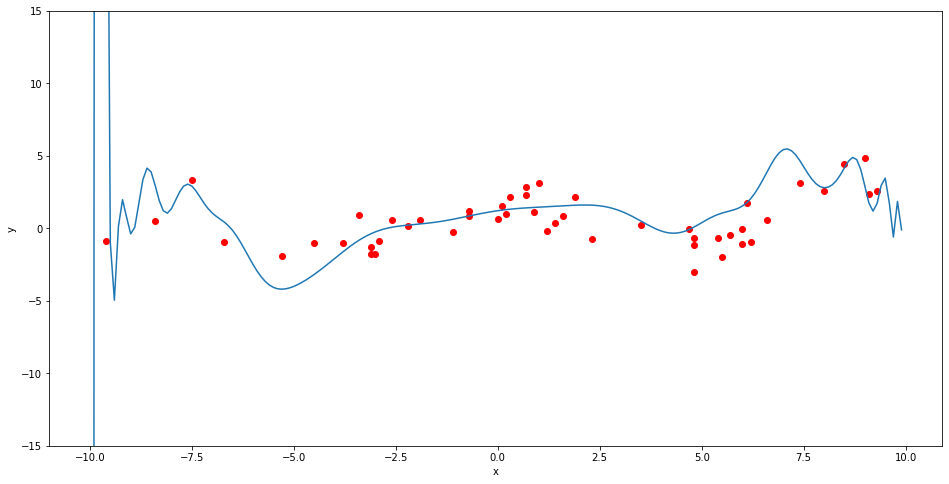

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

#ax.plot(x, f_x)
fx_plot = fx_pr(x.reshape(-1, 1))
ax.plot(x, fx_plot)
ax.scatter(X_test, y_test, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.ylim(-15,15)

plt.show()

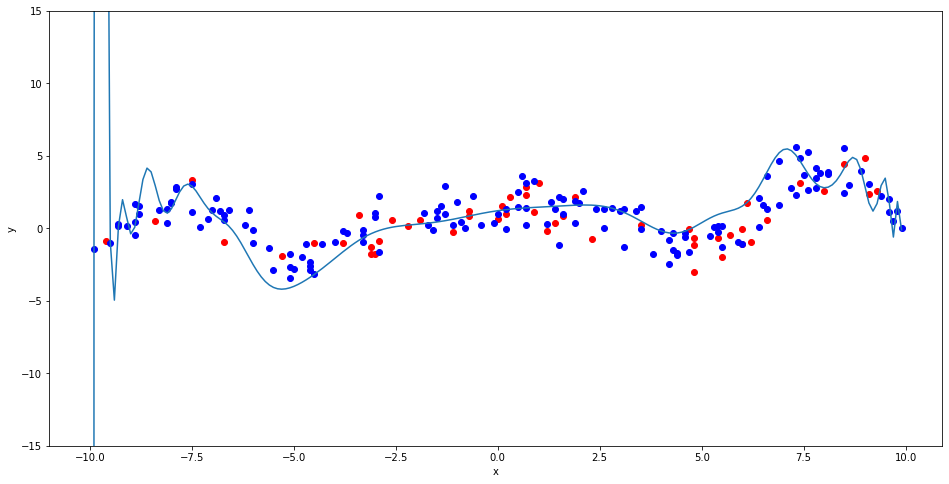

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

#ax.plot(x, f_x)
fx_plot = fx_pr(x.reshape(-1, 1))
ax.plot(x, fx_plot)
ax.scatter(X_test, y_test, color='red')
ax.scatter(X_train, y_train, color='blue')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.ylim(-15,15)

plt.show()

In [34]:
fx_test_pr = fx_pr(X_test_)
rmse_pr = mean_squared_error(y_test, fx_test_pr, squared=False)
print('RMSE (Baseline): ' + str(round(rmse_baseline, 3)))
print('RMSE (Linear Regression): ' + str(round(rmse_lr, 3)))
print('RMSE (Quadratic Regression): ' + str(round(rmse_qr, 3)))
print('RMSE (Polynomial Regression - n=20): ' + str(round(rmse_pr, 3)))

RMSE (Baseline): 1.755
RMSE (Linear Regression): 1.702
RMSE (Quadratic Regression): 1.648
RMSE (Polynomial Regression - n=20): 6.681


## Polynomial Regression (optimized degree)

In [35]:
param_grid_polynomial = {'polynomialfeatures__degree': np.arange(20)}
grid_polynomial = GridSearchCV(polynomial_model, param_grid_polynomial, cv=5)
np.random.seed(SEED)
grid_polynomial.fit(X_train_, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=50)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])})

In [36]:
grid_polynomial.best_params_['polynomialfeatures__degree']

15

In [37]:
def fx_gpr(x):
    return(grid_polynomial.predict(x))

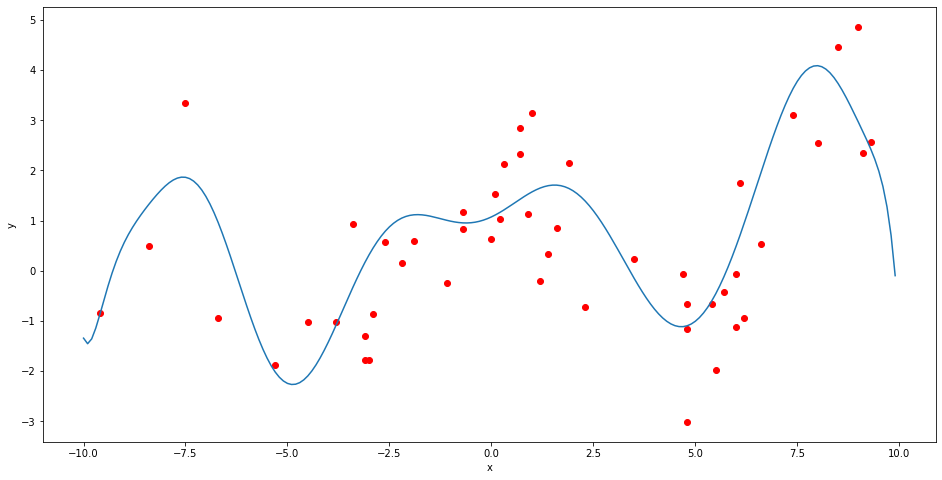

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

#ax.plot(x, f_x)
fx_plot = fx_gpr(x.reshape(-1, 1))
ax.plot(x, fx_plot)
ax.scatter(X_test, y_test, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [39]:
fx_test_gpr = fx_gpr(X_test_)
rmse_gpr = mean_squared_error(y_test, fx_test_gpr, squared=False)
print('RMSE (Baseline): ' + str(round(rmse_baseline, 3)))
print('RMSE (Linear Regression): ' + str(round(rmse_lr, 3)))
print('RMSE (Quadratic Regression): ' + str(round(rmse_qr, 3)))
print('RMSE (Polynomial Regression): ' + str(round(rmse_gpr, 3)))

RMSE (Baseline): 1.755
RMSE (Linear Regression): 1.702
RMSE (Quadratic Regression): 1.648
RMSE (Polynomial Regression): 1.146


In [40]:
elasticnet_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(interaction_only=False),
    ElasticNet(max_iter=1e5)
)

In [41]:
param_grid_elasticnet = {
    'polynomialfeatures__degree': np.arange(5,9),
    'elasticnet__alpha': np.logspace(-2,0,3),
    'elasticnet__l1_ratio': np.linspace(0,1,5)
}
grid_elasticnet = GridSearchCV(elasticnet_model, param_grid_elasticnet, cv=5)
np.random.seed(SEED)
grid_elasticnet.fit(X_train_, y_train)

/Users/opardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154.46835683967265, tolerance: 0.040746214233821694
  positive)
/Users/opardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.7709072877067, tolerance: 0.04524791823027398
  positive)
/Users/opardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.74693153916604, tolerance: 0.037845629309958384
  positive)
/Users/opardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want t

/Users/opardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144.10845847387031, tolerance: 0.040746214233821694
  positive)
/Users/opardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.99281906480226, tolerance: 0.04524791823027398
  positive)
/Users/opardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.16916157853458, tolerance: 0.037845629309958384
  positive)
/Users/opardo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet',
                                        ElasticNet(max_iter=100000.0))]),
             param_grid={'elasticnet__alpha': array([0.01, 0.1 , 1.  ]),
                         'elasticnet__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
                         'polynomialfeatures__degree': array([5, 6, 7, 8])})

In [42]:
grid_elasticnet.best_params_

{'elasticnet__alpha': 0.01,
 'elasticnet__l1_ratio': 1.0,
 'polynomialfeatures__degree': 7}

In [43]:
def fx_en(x):
    return(grid_elasticnet.predict(x))

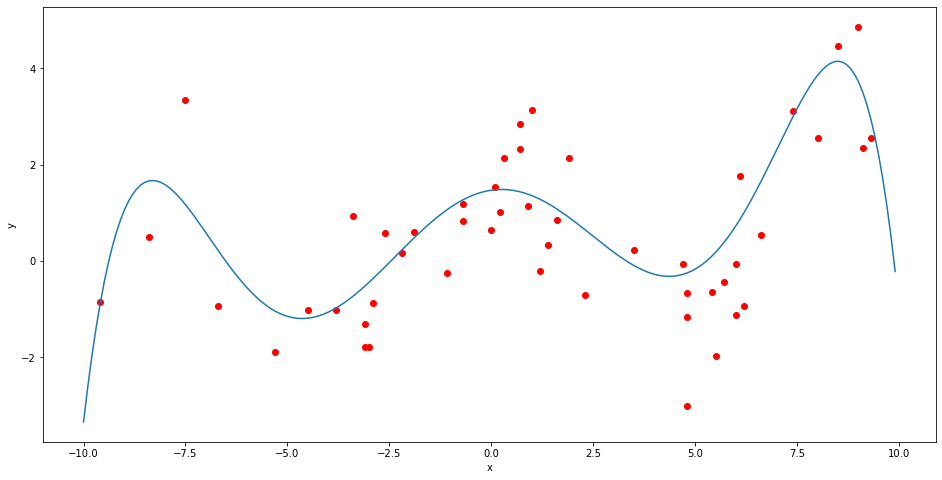

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

#ax.plot(x, f_x)
fx_plot = fx_en(x.reshape(-1, 1))
ax.plot(x, fx_plot)
ax.scatter(X_test, y_test, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [45]:
fx_test_en = fx_en(X_test_)
rmse_en = mean_squared_error(y_test, fx_test_en, squared=False)
print('RMSE (Baseline): ' + str(round(rmse_baseline, 3)))
print('RMSE (Linear Regression): ' + str(round(rmse_lr, 3)))
print('RMSE (Quadratic Regression): ' + str(round(rmse_qr, 3)))
print('RMSE (Polynomial Regression): ' + str(round(rmse_gpr, 3)))
print('RMSE (Elastic Net): ' + str(round(rmse_en, 3)))

RMSE (Baseline): 1.755
RMSE (Linear Regression): 1.702
RMSE (Quadratic Regression): 1.648
RMSE (Polynomial Regression): 1.146
RMSE (Elastic Net): 1.101


## XGBoost Regression

In [46]:
xgb_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(interaction_only=False),
    XGBRegressor()
)

In [47]:
param_grid_xgb = {
    'polynomialfeatures__degree': np.arange(10,20),
    'xgbregressor__n_estimators': [5,10,50,100]
}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, n_jobs=6)
np.random.seed(SEED)
grid_xgb.fit(X_train_, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                              

In [48]:
grid_xgb.best_params_

{'polynomialfeatures__degree': 10, 'xgbregressor__n_estimators': 5}

In [49]:
def fx_xgb(x):
    return(grid_xgb.predict(x))

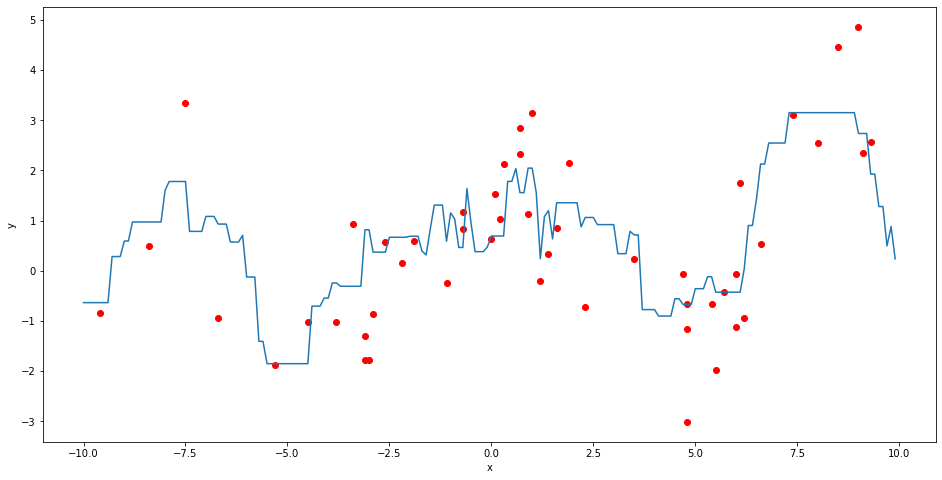

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, PLOT_SIZE/2))

#ax.plot(x, f_x)
fx_plot = fx_xgb(x.reshape(-1, 1))
ax.plot(x, fx_plot)
ax.scatter(X_test, y_test, color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

In [51]:
fx_test_xgb = fx_xgb(X_test_)
rmse_xgb = mean_squared_error(y_test, fx_test_xgb, squared=False)
print('RMSE (Baseline): ' + str(round(rmse_baseline, 3)))
print('RMSE (Linear Regression): ' + str(round(rmse_lr, 3)))
print('RMSE (Quadratic Regression): ' + str(round(rmse_qr, 3)))
print('RMSE (Polynomial Regression): ' + str(round(rmse_gpr, 3)))
print('RMSE (Elastic Net): ' + str(round(rmse_en, 3)))
print('RMSE (XGBoost): ' + str(round(rmse_xgb, 3)))

RMSE (Baseline): 1.755
RMSE (Linear Regression): 1.702
RMSE (Quadratic Regression): 1.648
RMSE (Polynomial Regression): 1.146
RMSE (Elastic Net): 1.101
RMSE (XGBoost): 1.162


## Wrapping Up...

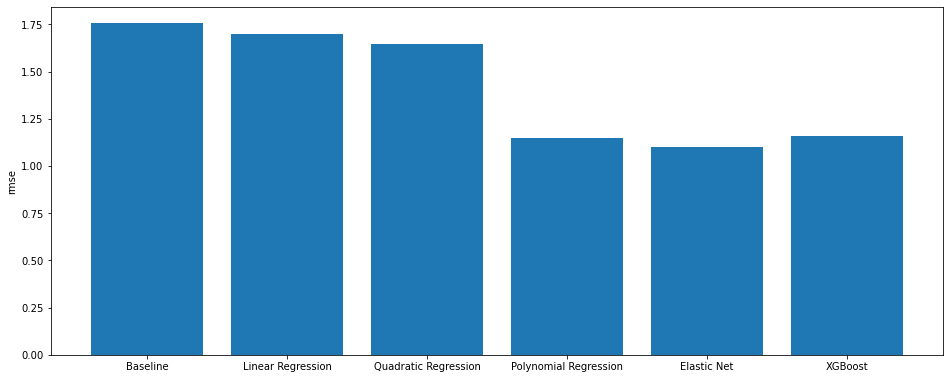

In [52]:
model_names = [
    'Baseline',
    'Linear Regression',
    'Quadratic Regression',
    'Polynomial Regression',
    'Elastic Net',
    'XGBoost'
]

rmses = [
    rmse_baseline,
    rmse_lr,
    rmse_qr,
    rmse_gpr,
    rmse_en,
    rmse_xgb 
]

fig, ax = plt.subplots(1, 1, figsize=(PLOT_SIZE, 0.4 * PLOT_SIZE))

ax.bar(model_names, rmses)
ax.set_ylabel('rmse')

plt.show()

### How can we know if there is still room to improve the model?

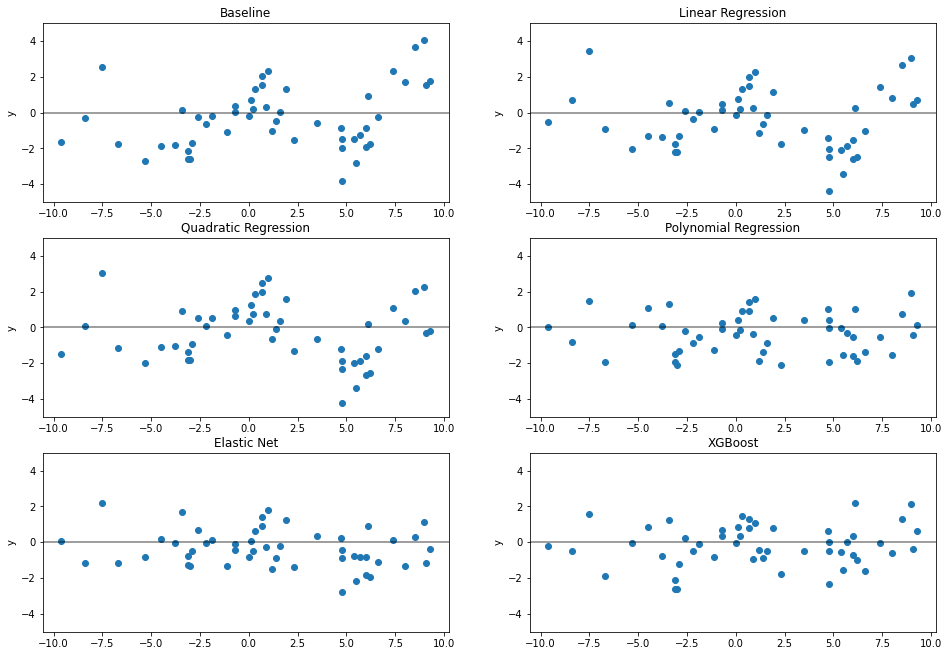

In [53]:
model_names = [
    'Baseline',
    'Linear Regression',
    'Quadratic Regression',
    'Polynomial Regression',
    'Elastic Net',
    'XGBoost'
]

model_predictions = [
    fx_test_baseline,
    fx_test_lr,
    fx_test_qr,
    fx_test_gpr,
    fx_test_en,
    fx_test_xgb
]

K = len(model_names)

fig, ax = plt.subplots(3, 2, figsize=(PLOT_SIZE, 0.7 * PLOT_SIZE))

for k in np.arange(K):
    
    i = int(np.floor(k/2))
    j = int(k % 2)
    y_pred = model_predictions[k]
    model = model_names[k]
    
    ax[i,j].scatter(X_test, y_test - y_pred)
    ax[i,j].set_ylabel('y')
    ax[i,j].set_title(model)
    ax[i,j].axhline(y=0, color = 'black', alpha = 0.5)
    ax[i,j].set_ylim(-5,5)

plt.show()

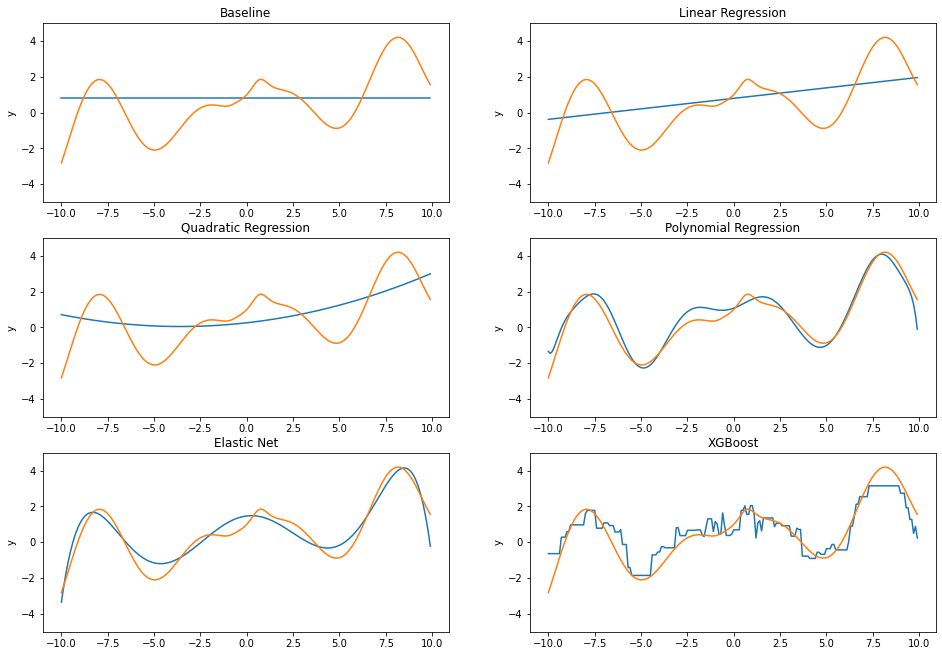

In [54]:
model_names = [
    'Baseline',
    'Linear Regression',
    'Quadratic Regression',
    'Polynomial Regression',
    'Elastic Net',
    'XGBoost'
]

model_fxs = [
    [fx_baseline(x) for x in x],
    fx_lr(x.reshape(-1, 1)),
    fx_qr(x.reshape(-1, 1)),
    fx_gpr(x.reshape(-1, 1)),
    fx_en(x.reshape(-1, 1)),
    fx_xgb(x.reshape(-1, 1))
]

K = len(model_names)

fig, ax = plt.subplots(3, 2, figsize=(PLOT_SIZE, 0.7 * PLOT_SIZE))

for k in np.arange(K):
    
    i = int(np.floor(k/2))
    j = int(k % 2)
    fx = model_fxs[k]
    model = model_names[k]
    
    ax[i,j].plot(x, fx)
    ax[i,j].plot(x, true_function(x))
    ax[i,j].set_ylabel('y')
    ax[i,j].set_title(model)
    ax[i,j].set_ylim(-5,5)

plt.show()

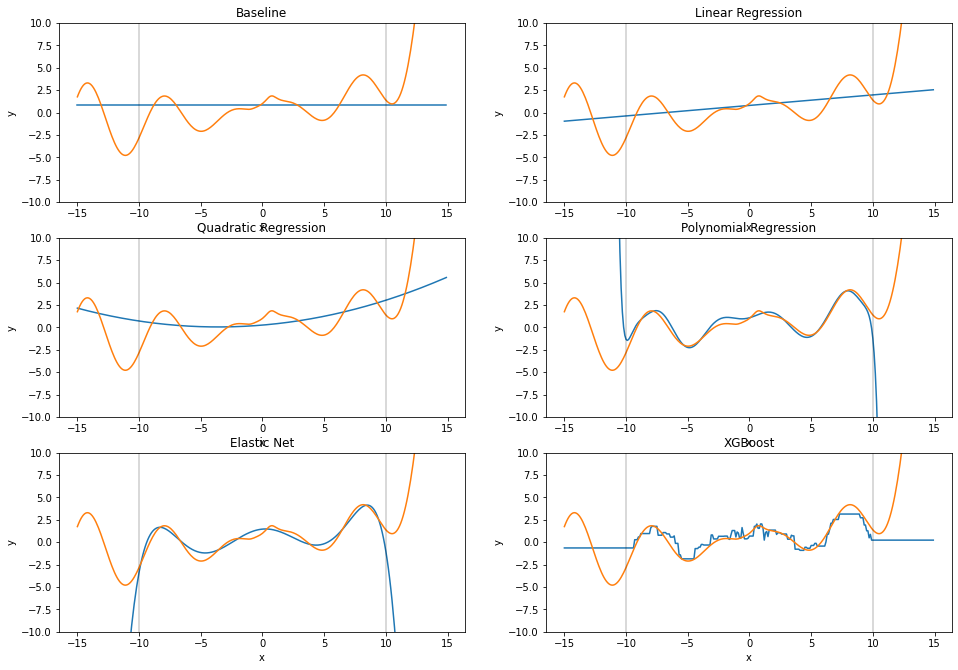

In [55]:
model_names = [
    'Baseline',
    'Linear Regression',
    'Quadratic Regression',
    'Polynomial Regression',
    'Elastic Net',
    'XGBoost'
]

x_extended = np.arange(x_min - 5, x_max + 5, 0.1)

model_fxs = [
    [fx_baseline(x) for x in x_extended],
    fx_lr(x_extended.reshape(-1, 1)),
    fx_qr(x_extended.reshape(-1, 1)),
    fx_gpr(x_extended.reshape(-1, 1)),
    fx_en(x_extended.reshape(-1, 1)),
    fx_xgb(x_extended.reshape(-1, 1))
]

K = len(model_names)

fig, ax = plt.subplots(3, 2, figsize=(PLOT_SIZE, 0.7 * PLOT_SIZE))

for k in np.arange(K):
    
    i = int(np.floor(k/2))
    j = int(k % 2)
    fx = model_fxs[k]
    model = model_names[k]
    
    ax[i,j].plot(x_extended, fx)
    ax[i,j].plot(x_extended, true_function(x_extended))
    ax[i,j].axvline(x=x_min, color = 'black', alpha = 0.2)
    ax[i,j].axvline(x=x_max, color = 'black', alpha = 0.2)
    ax[i,j].set_xlabel('x')
    ax[i,j].set_ylabel('y')
    ax[i,j].set_title(model)
    ax[i,j].set_ylim(-10,10)

plt.show()